<div style="font-size:18pt; padding-top:20px; text-align:center"><b>Глава 3. Визуализация данных</b></div><div style="font-size:18pt; padding-top:20px; text-align:center">Практическая работа</div><hr>

Импортируйте библиотеку в ноутбук:

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/howpop_train.csv')
df

,url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
0,https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0.0,0.0,-0.792687,-1.344075,-2.436871
1,https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания ...",1,1,353,1.0,0.0,-0.485214,-0.831946,-1.873193
2,https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания ...",47,72,1200,45.0,5.0,0.446090,1.794023,0.574656
3,https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72.0,3.0,1.627469,1.300050,1.167375
4,https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,NaN,False,3706,Почему мне не нравится iPhone,230,6,1400,73.0,15.0,1.362397,0.961094,2.020356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134132,https://habrahabr.ru/company/mailru/blog/314014/,habrahabr.ru,314014,2016-10-31 21:45:00,NaN,develop,False,56033,Парсинг JSON — это минное поле,58,347,35500,164.0,6.0,1.870174,2.124862,1.258447
134133,https://geektimes.ru/post/282086/,geektimes.ru,282086,2016-10-31 22:44:00,@marks,NaN,False,5504,Заработала система раннего предупреждения НАСА...,52,16,12900,22.0,0.0,-0.091464,-0.511814,0.465118
134134,https://geektimes.ru/post/282090/,geektimes.ru,282090,2016-10-31 23:26:00,@Shapelez,NaN,False,2883,Арзамасский городской суд постановил заблокиро...,16,14,15800,28.0,4.0,0.198924,-0.656390,-0.408714
134135,https://geektimes.ru/post/282092/,geektimes.ru,282092,2016-10-31 23:52:00,@ragequit,NaN,False,5735,Медиа-коммуникационный союз планирует внести в...,47,14,15000,20.0,0.0,0.124244,-0.655385,0.389636


In [4]:
df.drop(
    filter(lambda c: c.endswith("_lognorm"), df.columns),
    axis=1,  # axis = 1: столбцы
    inplace=True,
) 

In [7]:
df.describe()

,post_id,content_len,comments,favs,views,votes_plus,votes_minus
count,134137.000000,134137.000000,134137.000000,134137.000000,1.341370e+05,133566.000000,133566.000000
mean,181307.054265,7516.929699,39.625994,71.999866,1.663101e+04,35.536888,8.050035
std,81766.350702,8724.771640,62.398958,145.854135,3.147982e+04,42.461073,11.398282
min,18284.000000,1.000000,0.000000,0.000000,3.000000e+00,0.000000,0.000000
25%,115565.000000,2179.000000,7.000000,8.000000,2.100000e+03,11.000000,2.000000
50%,182666.000000,4949.000000,19.000000,27.000000,7.600000e+03,22.000000,5.000000
75%,257401.000000,9858.000000,48.000000,78.000000,1.870000e+04,45.000000,10.000000
max,314088.000000,352471.000000,2266.000000,8718.000000,1.730000e+06,1466.000000,445.000000


In [8]:
print(df.published.dtype)
df["published"] = pd.to_datetime(df.published, yearfirst=True)
print(df.published.dtype)
df["year"] = [d.year for d in df.published]
df["month"] = [d.month for d in df.published]

df["dayofweek"] = [d.isoweekday() for d in df.published]
df["hour"] = [d.hour for d in df.published]

object
datetime64[ns]


In [36]:
last = df.groupby(['year', 'month'])[['url']].count()
last[-12*2:]

url
year month      
2014 11     1462
     12     1694
2015 1      1504
     2      1793
     3      2189
     4      2110
     5      1799
     6      2004
     7      2111
     8      1849
     9      1944
     10     2030
     11     2035
     12     2084
2016 1      1717
     2      1819
     3      2115
     4      1910
     5      1726
     6      1498
     7      1278
     8      1278
     9      1482
     10     1493

<AxesSubplot:xlabel='year', ylabel='month'>

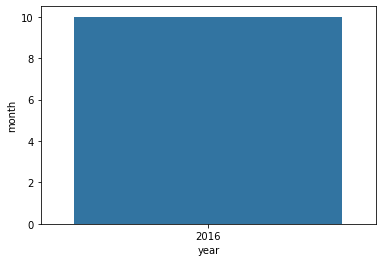

In [55]:
tt = pd.crosstab(df.month, df.year)
sns.barplot(x=df.year[-2:], y=df.month)
#sns.barplot(x=df.year, y=df.url, data=df, hue=df.month)